<a href="https://colab.research.google.com/github/Rohithtechis/DNN-classifier/blob/main/Deep_Learning_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/cancer_classification.csv')
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [44]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [45]:
data['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

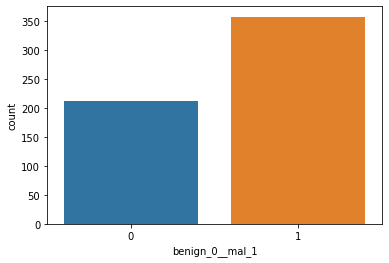

In [46]:
sns.countplot(x=data['benign_0__mal_1'])

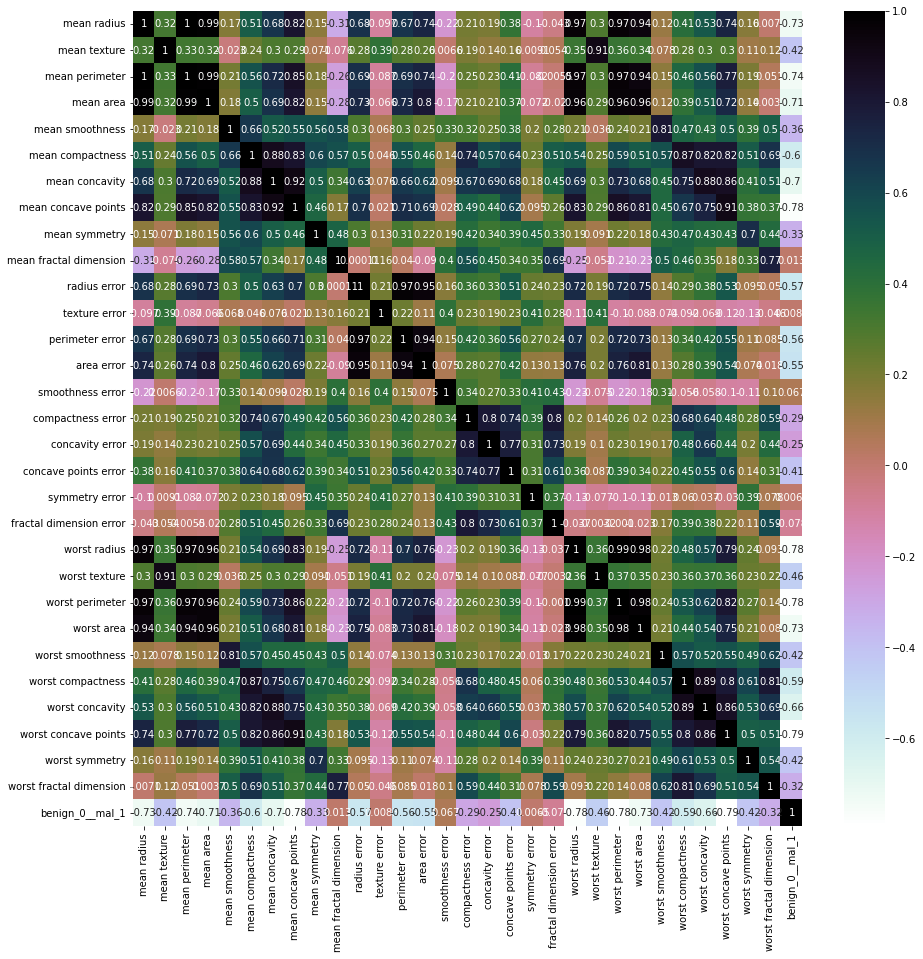

In [47]:
corr=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True,cmap="cubehelix_r")
plt.show()

In [48]:
X = data.drop('benign_0__mal_1', axis=1).values
y = data['benign_0__mal_1'].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [51]:
print(x_train1.shape)

(398, 30)


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [53]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model.fit(x_train1,y_train,validation_data=(X_test1,y_test),epochs=600,batch_size=20)

Epoch 1/600
20/20 [==============================] - 1s 10ms/step - loss: 0.6554 - val_loss: 0.6218
Epoch 2/600
20/20 [==============================] - 0s 3ms/step - loss: 0.5996 - val_loss: 0.5635
Epoch 3/600
20/20 [==============================] - 0s 4ms/step - loss: 0.5426 - val_loss: 0.4985
Epoch 4/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4791 - val_loss: 0.4325
Epoch 5/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4157 - val_loss: 0.3628
Epoch 6/600
20/20 [==============================] - 0s 4ms/step - loss: 0.3547 - val_loss: 0.3104
Epoch 7/600
20/20 [==============================] - 0s 3ms/step - loss: 0.3097 - val_loss: 0.2721
Epoch 8/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2762 - val_loss: 0.2458
Epoch 9/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2521 - val_loss: 0.2250
Epoch 10/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2296 - val_loss: 0.2086
Epoch 11

In [55]:
losses = pd.DataFrame(model.history.history)

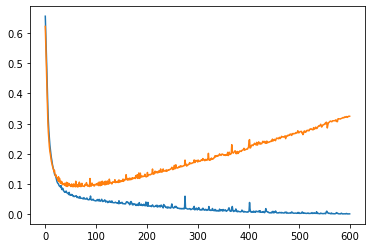

In [56]:
plt.plot(losses)

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [58]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [59]:
model.fit(x_train1,y_train,validation_data=(X_test1,y_test),
          epochs=600,batch_size=20,callbacks=[early_stop])

Epoch 1/600
20/20 [==============================] - 1s 10ms/step - loss: 0.6668 - val_loss: 0.6340
Epoch 2/600
20/20 [==============================] - 0s 3ms/step - loss: 0.6069 - val_loss: 0.5753
Epoch 3/600
20/20 [==============================] - 0s 3ms/step - loss: 0.5500 - val_loss: 0.5078
Epoch 4/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4850 - val_loss: 0.4339
Epoch 5/600
20/20 [==============================] - 0s 3ms/step - loss: 0.4181 - val_loss: 0.3725
Epoch 6/600
20/20 [==============================] - 0s 4ms/step - loss: 0.3591 - val_loss: 0.3130
Epoch 7/600
20/20 [==============================] - 0s 5ms/step - loss: 0.3035 - val_loss: 0.2702
Epoch 8/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2656 - val_loss: 0.2402
Epoch 9/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2359 - val_loss: 0.2159
Epoch 10/600
20/20 [==============================] - 0s 3ms/step - loss: 0.2142 - val_loss: 0.1988
Epoch 11

In [60]:
new_losses = pd.DataFrame(model.history.history)

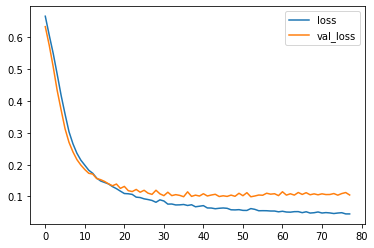

In [61]:
new_losses.plot()

In [62]:
from tensorflow.keras.layers import Dropout

In [63]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [64]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [65]:
model.fit(x_train1,y_train,validation_data=(X_test1,y_test),
          epochs=600,batch_size=20,callbacks=[early_stop])

Epoch 1/600
20/20 [==============================] - 1s 10ms/step - loss: 0.7028 - val_loss: 0.6526
Epoch 2/600
20/20 [==============================] - 0s 4ms/step - loss: 0.6689 - val_loss: 0.6341
Epoch 3/600
20/20 [==============================] - 0s 3ms/step - loss: 0.6379 - val_loss: 0.6075
Epoch 4/600
20/20 [==============================] - 0s 3ms/step - loss: 0.6278 - val_loss: 0.5684
Epoch 5/600
20/20 [==============================] - 0s 3ms/step - loss: 0.5898 - val_loss: 0.5285
Epoch 6/600
20/20 [==============================] - 0s 3ms/step - loss: 0.5525 - val_loss: 0.4786
Epoch 7/600
20/20 [==============================] - 0s 3ms/step - loss: 0.5201 - val_loss: 0.4199
Epoch 8/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4929 - val_loss: 0.3782
Epoch 9/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4595 - val_loss: 0.3468
Epoch 10/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4244 - val_loss: 0.3131
Epoch 11

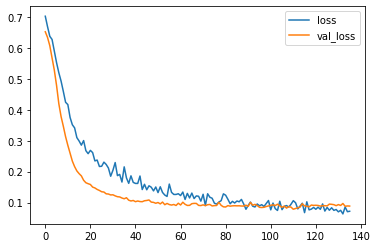

In [66]:
new_losses_drop = pd.DataFrame(model.history.history)
new_losses_drop.plot()

In [67]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [70]:
#pred = model.predict(X_test1)
#pred = model.predict_classes(x_test_scale)
pred = (model.predict(X_test1) > 0.5).astype("int32")

In [72]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.97        59
           1       0.97      0.99      0.98       112

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [73]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(data,test_size=0.25)

In [74]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [75]:
X_train=train.drop(['benign_0__mal_1'],axis=1)
y_train=train['benign_0__mal_1']
X_test=test.drop(['benign_0__mal_1'],axis=1)
y_test=test['benign_0__mal_1']

In [76]:
print('Dimension of X_train dataframe:',X_train.shape)
print('Dimension of y_train dataframe:',X_train.shape)
print('Dimension of X_test dataframe:',X_test.shape)
print('Dimension of y_test dataframe:',y_test.shape)

Dimension of X_train dataframe: (426, 30)
Dimension of y_train dataframe: (426, 30)
Dimension of X_test dataframe: (143, 30)
Dimension of y_test dataframe: (143,)


In [77]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
LR=model.score(X_test,y_test)
LR

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.951048951048951

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
abcl_score=abcl.score(X_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(confusion_matrix(y_test,test_pred))

The Adaboost Ensemble model accuracy is 0.9370629370629371
The confusion matrix of Adaboost Ensemble model is
[[51  6]
 [ 3 83]]


In [81]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
xgbl=XGBClassifier()
xgbl.fit(X_train,y_train)
test_pred=xgbl.predict(X_test)
xgbl_score=xgbl.score(X_test,y_test)
print("The XGBoostclassifier model accuracy is {}".format(xgbl_score))
print("The confusion matrix of XGBoostclassifier model is")
print(confusion_matrix(y_test,test_pred))

The XGBoostclassifier model accuracy is 0.9370629370629371
The confusion matrix of XGBoostclassifier model is
[[50  7]
 [ 2 84]]


In [82]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.9370629370629371
The confusion matrix of Bagging classifier model is
[[51  6]
 [ 3 83]]


In [86]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_train)
pred
#validation of built model
from sklearn.metrics import accuracy_score

accuracy_score(pred,y_train)

0.9812206572769953

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl_score=rfcl.score(X_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Random forest model accuracy is 0.9370629370629371
The confusion matrix of Random Forest Model is
[[51  6]
 [ 3 83]]


In [89]:
from sklearn.naive_bayes import GaussianNB
nvclassifier=GaussianNB()
nvclassifier.fit(X_train,y_train)
Y_pred=nvclassifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("The Accuracy of the NB is",round(accuracy_score(Y_pred,y_test)*100,2))

The Accuracy of the NB is 93.71


In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_accuracy=[]
for k in range(3,10):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_pred=knn.predict(X_train)
  train_score=accuracy_score(train_pred,y_train)
  test_pred= knn.predict(X_test)
  test_score=(round(accuracy_score(test_pred,y_test)*100,2))
  test_accuracy.append(test_score)
  print("Test Accuracy: ",test_score,"Value of K: ",k)

Test Accuracy:  91.61 Value of K:  3
Test Accuracy:  93.01 Value of K:  4
Test Accuracy:  93.01 Value of K:  5
Test Accuracy:  94.41 Value of K:  6
Test Accuracy:  95.1 Value of K:  7
Test Accuracy:  95.1 Value of K:  8
Test Accuracy:  93.71 Value of K:  9
